In [3]:
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from shapely.geometry import Point
6
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 160

In [81]:
!pip install geodatasets

In [82]:
import geodatasets

In [83]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

## Combine eco data and chicago community boundaries 

In [84]:
boundaries_fp='./data/geo_export.shp'
ecodata_fp='./data/Community_Data_Snapshots_2023.csv'

boundaries=gpd.read_file(boundaries_fp)

ecodata=pd.read_csv(ecodata_fp)

In [85]:
boundaries

,perimeter,community,shape_len,shape_area,area,comarea,area_numbe,area_num_1,comarea_id,geometry
0,0.0,DOUGLAS,31027.054510,4.600462e+07,0.0,0.0,35,35,0.0,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,OAKLAND,19565.506153,1.691396e+07,0.0,0.0,36,36,0.0,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,FULLER PARK,25339.089750,1.991670e+07,0.0,0.0,37,37,0.0,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,GRAND BOULEVARD,28196.837157,4.849250e+07,0.0,0.0,38,38,0.0,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,KENWOOD,23325.167906,2.907174e+07,0.0,0.0,39,39,0.0,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...
72,0.0,MOUNT GREENWOOD,48665.130539,7.558429e+07,0.0,0.0,74,74,0.0,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,MORGAN PARK,46396.419362,9.187734e+07,0.0,0.0,75,75,0.0,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,OHARE,173625.984660,3.718356e+08,0.0,0.0,76,76,0.0,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,EDGEWATER,31004.830946,4.844999e+07,0.0,0.0,77,77,0.0,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


In [86]:
ecodata

,OBJECTID,GEOID,GEOG,2000_POP,2010_POP,2020_POP,2020_HH,2020_HH_SIZE,TOT_POP,UND5,...,highly_walkable_pop_pct,highly_walkable_emp_pct,assoc_plus_pct,in_lbr_frc_pct,pct_pop_access_4_acres_per_1k,pct_pop_access_10_acres_per_1k,impervious_acres_per_hh,modhigh_ta_pop_pct,modhigh_ta_emp_pct,nonsov_pct
0,1,14,Albany Park,57655,51542,48396,17161,2.742731,48647.00000,2538.000000,...,1.000000,1.000000,0.457503,0.819020,0.000000,0.000000,0.052479,1.0,1.0,0.538134
1,2,57,Archer Heights,12644,13393,14196,4163,3.403315,13591.00000,874.000000,...,0.994887,0.439369,0.146899,0.791877,0.000000,0.000000,0.259476,1.0,1.0,0.407037
2,3,34,Armour Square,12032,13391,13890,5648,2.446353,13323.66393,671.262295,...,1.000000,1.000000,0.323964,0.815347,0.200206,0.000000,0.094773,1.0,1.0,0.569835
3,4,70,Ashburn,39584,41081,41098,12909,3.140367,44215.00000,2319.000000,...,0.872049,0.587267,0.297459,0.776386,0.144637,0.000000,0.160631,1.0,1.0,0.291486
4,5,71,Auburn Gresham,55928,48743,44878,18071,2.476620,48039.00000,3408.000000,...,0.950208,0.878471,0.245749,0.708108,0.027726,0.000000,0.091181,1.0,1.0,0.406434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,65,West Lawn,29235,33355,33662,9244,3.635115,32398.00000,2633.000000,...,0.927448,0.454832,0.172299,0.789833,0.026699,0.000000,0.154499,1.0,1.0,0.293069
73,74,53,West Pullman,36649,29651,26104,9650,2.703316,26951.00000,1674.000000,...,0.909574,0.874166,0.250147,0.783332,0.182974,0.000000,0.138739,1.0,1.0,0.334058
74,75,2,West Ridge,73199,71942,77122,26493,2.850980,79897.00000,6321.000000,...,1.000000,1.000000,0.469918,0.774887,0.193019,0.000000,0.054500,1.0,1.0,0.366949
75,76,24,West Town,87435,82236,87781,42920,2.033527,86870.00000,5250.000000,...,1.000000,1.000000,0.758246,0.902659,0.095257,0.000000,0.054430,1.0,1.0,0.578903


In [90]:
ecodata['GEOID']=ecodata['GEOID'].astype('int')
boundaries['area_numbe']=boundaries['area_numbe'].astype(int)

In [91]:
boundaries_data=boundaries.merge(ecodata, how='left',left_on='area_numbe',right_on='GEOID')

<AxesSubplot:>

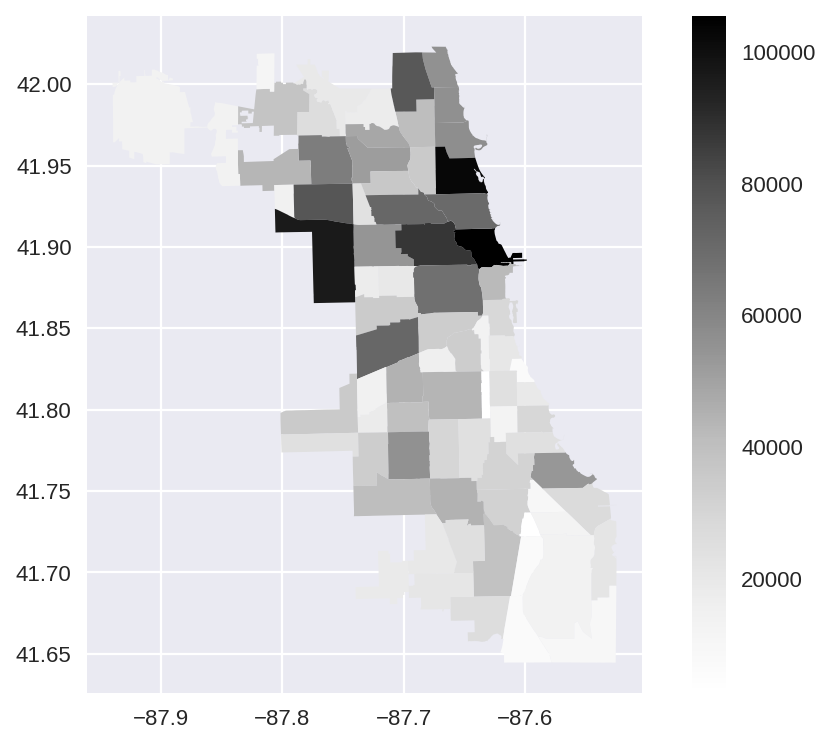

In [92]:
boundaries_data.plot(column='2020_POP',legend=True)

## Use package geodatasets

In [93]:
chicago_commpop = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

In [94]:
chicago_commpop

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,74,19093,18820,273,1.450584,1,0,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,75,22544,25226,-2682,-10.631888,0,1,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,76,12756,11956,800,6.691201,1,0,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,77,56521,62198,-5677,-9.127303,0,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


<AxesSubplot:>

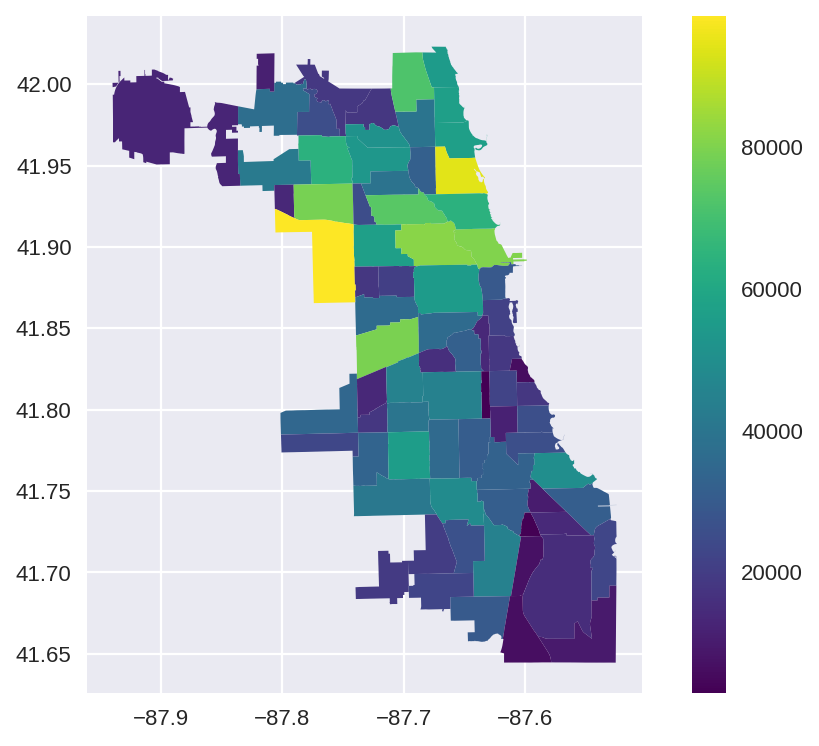

In [102]:
colormap = plt.cm.get_cmap('viridis')
chicago_commpop.plot(column='POP2010',cmap=colormap, legend=True)

## econ data

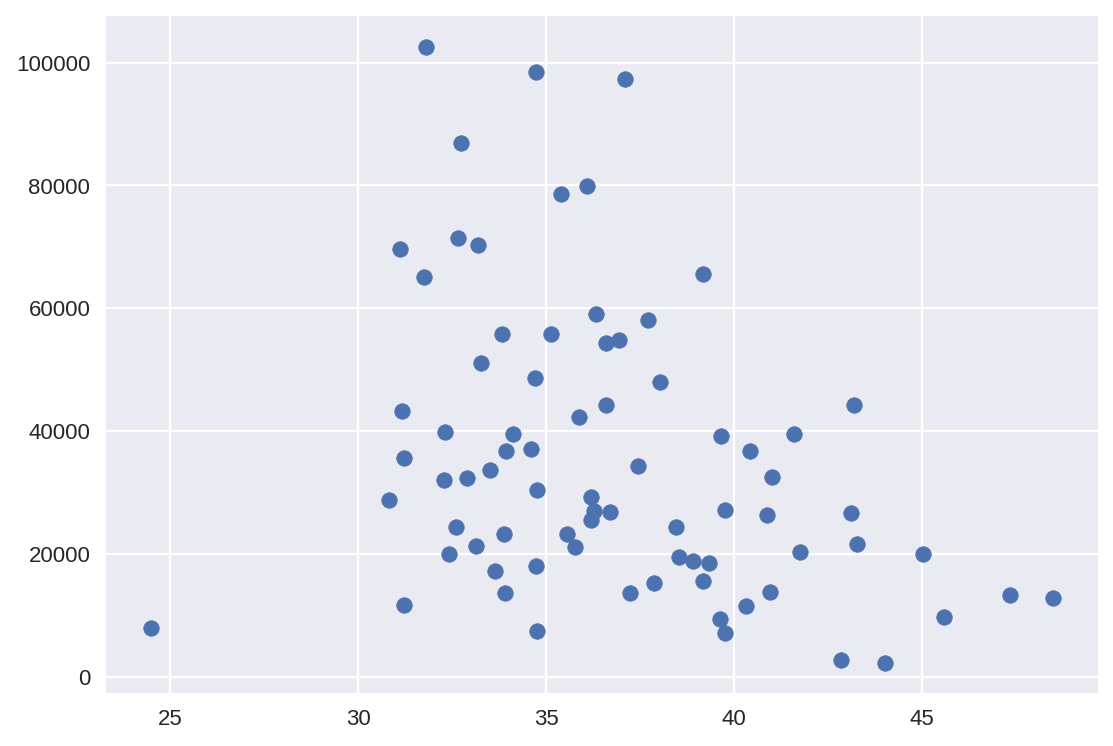

In [96]:
plt.scatter(boundaries_data['MED_AGE'],boundaries_data['TOT_POP'])

Text(0.5, 1.0, 'UNemployment rate vs total population')

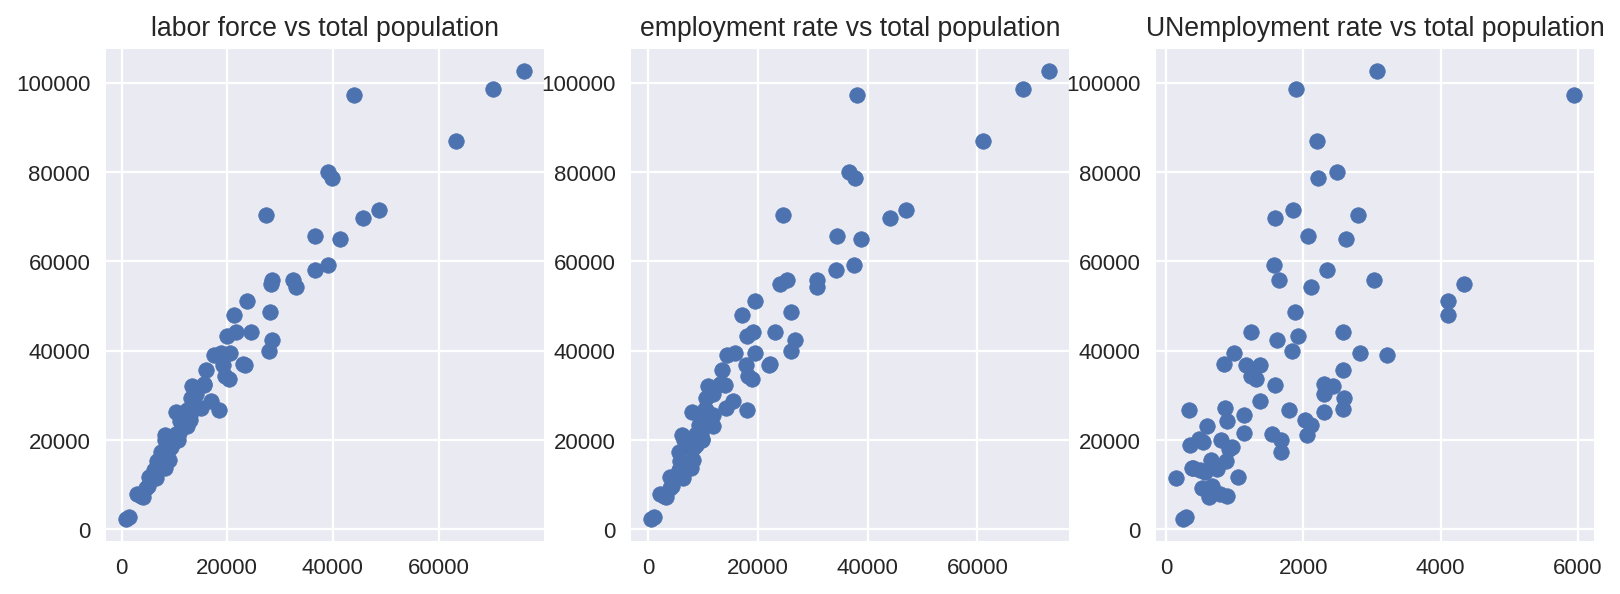

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs = np.ravel(axs)
i=0
plt.sca(axs[i])
plt.scatter(boundaries_data['IN_LBFRC'],boundaries_data['TOT_POP'])
plt.title('labor force vs total population')

i=1
plt.sca(axs[i])
plt.scatter(boundaries_data['EMP'],boundaries_data['TOT_POP'])
plt.title('employment rate vs total population')

i=2
plt.sca(axs[i])
plt.scatter(boundaries_data['UNEMP'],boundaries_data['TOT_POP'])
plt.title('UNemployment rate vs total population')

Text(0.5, 1.0, 'INCPERCAP vs total pop')

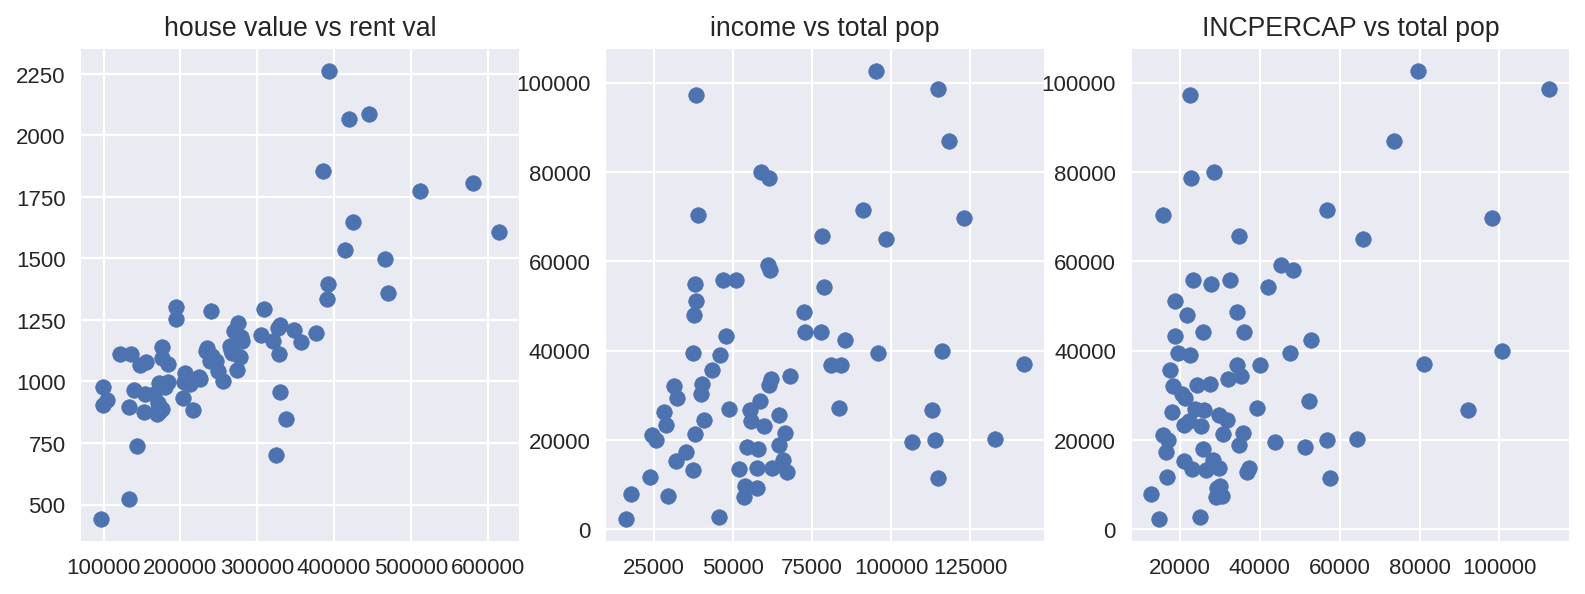

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs = np.ravel(axs)
i=0
plt.sca(axs[i])
plt.scatter(boundaries_data['MED_HV'],boundaries_data['MED_RENT'])
plt.title('house value vs rent val')

plt.sca(axs[1])
plt.scatter(boundaries_data['MEDINC'],boundaries_data['TOT_POP'])
plt.title('income vs total pop')

plt.sca(axs[2])
plt.scatter(boundaries_data['INCPERCAP'],boundaries_data['TOT_POP'])
plt.title('INCPERCAP vs total pop')


<AxesSubplot:>

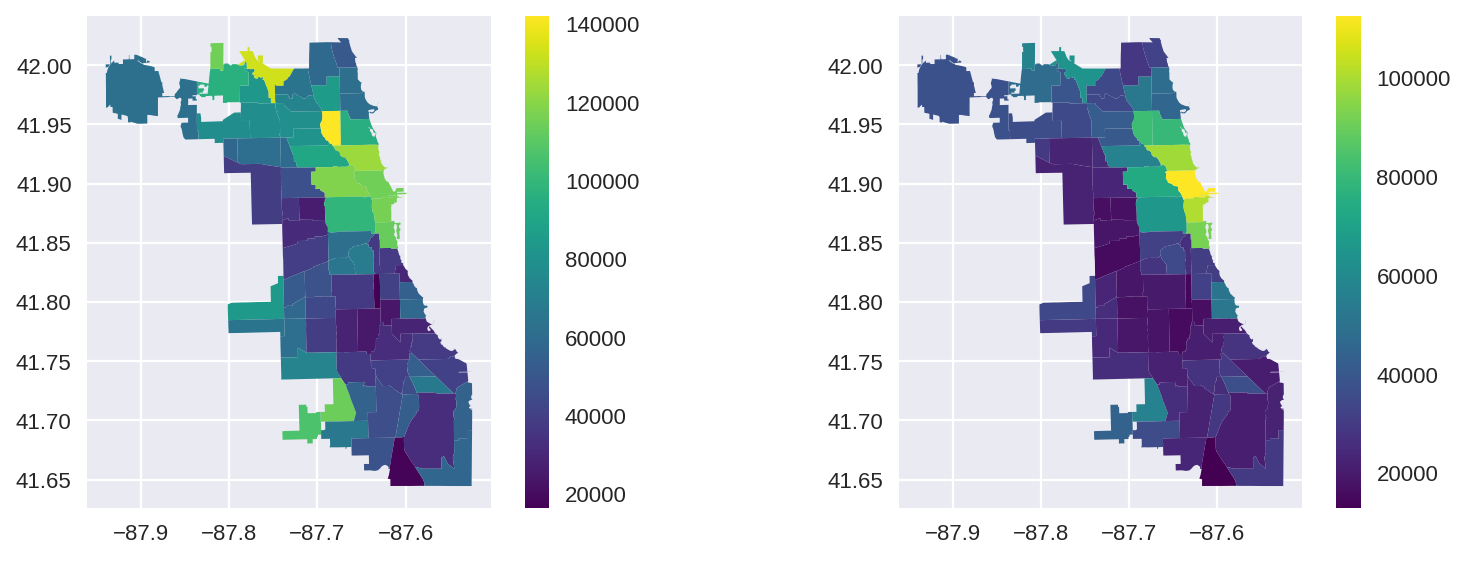

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

boundaries_data.plot(column='MEDINC',cmap=colormap,legend=True,ax=axs[0])
boundaries_data.plot(column='INCPERCAP',cmap=colormap,legend=True,ax=axs[1])

## add libraries

In [104]:
libraries=gpd.read_file('./data/libraries.csv')

In [105]:
def string_to_points(point):
    #Remove bracketsfrom shapely.geometry import Point
    point = point.replace ("(", "")
    point = point.replace (")", "")

    #Parse the location string
    loc = point.split (',')

    #Returns tuple
    return Point(float (loc[1]), float (loc[0]))

In [106]:
libraries['geometry']=libraries['LOCATION'].apply(string_to_points)

In [107]:
libraries.head()

,NAME,HOURS OF OPERATION,CYBERNAVIGATOR,TEACHER IN THE LIBRARY,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,geometry
0,Albany Park,"M, W: 10AM-6PM; TU, TH: 12PM-8PM; F, SA: 9AM-...",Yes,Yes,3401 W. Foster Avenue,CHICAGO,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.975456, -87.71409)",POINT (-87.71409 41.97546)
1,Altgeld,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,13281 S. Corliss Avenue,CHICAGO,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65473021837776, -87.6022302609835)",POINT (-87.60223 41.65473)
2,Archer Heights,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,5055 S. Archer Avenue,CHICAGO,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.8012136599335, -87.72649071431441)",POINT (-87.72649 41.80121)
3,Austin,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",Yes,Yes,5615 W. Race Avenue,CHICAGO,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.889272153514526, -87.76571186722818)",POINT (-87.76571 41.88927)
4,Austin-Irving,"M, W: 12PM-8PM; TU, TH: 10AM-6PM; F, SA: 9AM-5...",No,Yes,6100 W. Irving Park Road,CHICAGO,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95317390064158, -87.77938682073541)",POINT (-87.77939 41.95317)


<AxesSubplot:>

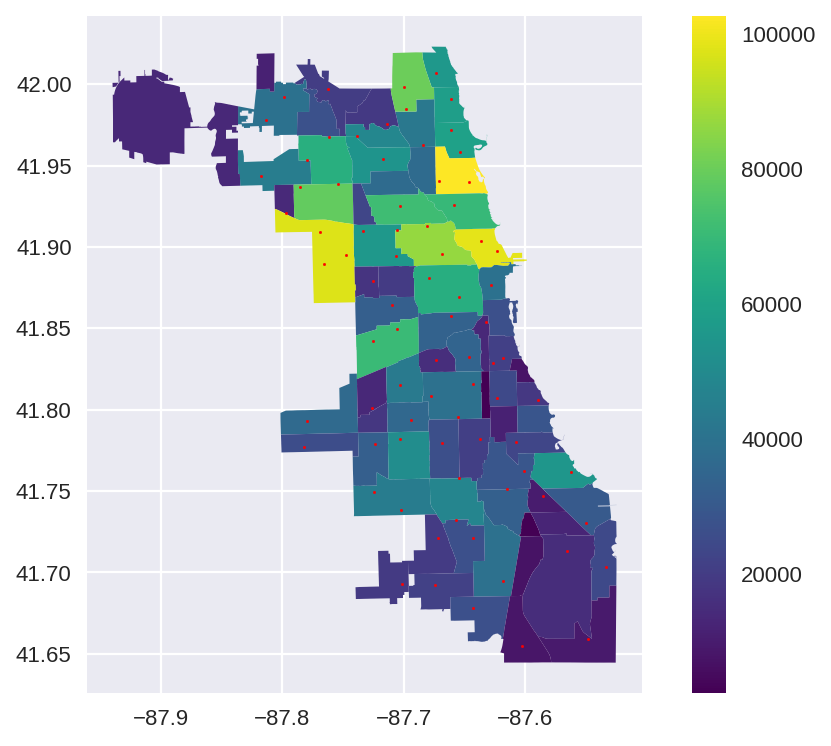

In [109]:
ax=libraries.plot(color='r',markersize=1,zorder=2)
boundaries_data.plot(column='TOT_POP',ax=ax,zorder=1,cmap=colormap,legend=True)

 ## add crime

In [110]:
crime_2015_9=gpd.read_file('./data/Crimes_till20221017.csv')

In [139]:
crime_2015_9.describe()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
count,257314,257314,257314,257314,257314,257314,256191,257314,257314,257314,257311,257314,253791,253791,253791,253791,253791,0
unique,257284,120966,28642,311,31,289,132,2,2,275,50,26,51120,71968,126682,126675,126713,0
top,JF505994,01/01/2023 12:00:00 AM,001XX N STATE ST,0910,THEFT,SIMPLE,STREET,N,N,1834,27,06,1176352,1900927,41.883500187,-87.627876698,"(41.883500187, -87.627876698)",NaN
freq,3,105,786,21389,56040,28957,78241,228169,211448,3164,11924,56040,482,419,418,418,418,NaN


In [112]:
crime_2015_9.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,JF462937,11/03/2022 07:00:00 PM,031XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,N,N,912,12,06,,,,,,None
1,JF463363,11/03/2022 09:00:00 PM,025XX N ELSTON AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1432,1,06,,,,,,None
2,JF461531,11/03/2022 01:00:00 PM,028XX N MERRIMAC AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,N,N,2511,30,14,,,,,,None
3,JF502909,12/08/2022 11:30:00 AM,021XX N ELSTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),N,N,1432,32,11,,,,,,None
4,JF491558,11/18/2022 04:50:00 AM,007XX S Wells St,0810,THEFT,OVER $500,RESIDENCE - GARAGE,N,N,123,25,06,,,,,,None


In [113]:
crime_2015_9.replace('',np.nan,inplace=True)

In [114]:
crime=crime_2015_9.dropna(subset=['LATITUDE'])

In [140]:
crime

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry,community
84,JG406115,08/31/2023 07:00:00 PM,042XX W MARQUETTE RD,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",APARTMENT,Y,Y,833,23,04B,1149062,1859830,41.771296232,-87.729149311,"(41.771296232, -87.729149311)",POINT (-87.72915 41.77130),WEST LAWN
86,JG405111,08/31/2023 10:52:00 AM,004XX W 38TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,N,Y,915,11,08B,1174032,1879735,41.82539977,-87.637026874,"(41.82539977, -87.637026874)",POINT (-87.63703 41.82540),BRIDGEPORT
97,JG464444,10/15/2023 02:30:00 AM,005XX N HALSTED ST,031A,ROBBERY,ARMED - HANDGUN,STREET,N,N,1214,27,03,1170952,1903935,41.891874434,-87.647617474,"(41.891874434, -87.647617474)",POINT (-87.64762 41.89187),WEST TOWN
128,JF254640,12/08/2022 03:38:00 PM,004XX N LOWER WABASH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,Y,N,1834,42,01A,1176592,1902931,41.888993854,-87.626934833,"(41.888993854, -87.626934833)",POINT (-87.62693 41.88899),NEAR NORTH SIDE
132,JG412467,08/31/2023 09:13:00 PM,093XX S WABASH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,634,6,07,1178354,1843057,41.724654303,-87.622283278,"(41.724654303, -87.622283278)",POINT (-87.62228 41.72465),ROSELAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257309,JG364916,07/31/2023 12:00:00 AM,064XX S RHODES AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,N,Y,312,20,04B,1181010,1862410,41.777700447,-87.611960085,"(41.777700447, -87.611960085)",POINT (-87.61196 41.77770),WOODLAWN
257310,JG149582,01/28/2023 11:31:00 PM,038XX W 59TH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,N,N,822,23,11,1151739,1865206,41.785996793,-87.719195501,"(41.785996793, -87.719195501)",POINT (-87.71920 41.78600),WEST LAWN
257311,JG305358,06/18/2023 01:05:00 AM,012XX N STATE PKWY,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,Y,Y,1824,2,04B,1176068,1908513,41.904322962,-87.628690783,"(41.904322962, -87.628690783)",POINT (-87.62869 41.90432),NEAR NORTH SIDE
257312,JF529073,12/31/2022 04:00:00 PM,024XX E 79TH ST,0560,ASSAULT,SIMPLE,RESTAURANT,N,N,422,7,08A,1193792,1853060,41.751739567,-87.565407903,"(41.751739567, -87.565407903)",POINT (-87.56541 41.75174),SOUTH SHORE


In [116]:
crime['geometry']=crime['LOCATION'].apply(string_to_points)

/home/siji/anaconda3/envs/gnn/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [117]:
community_dict={}

for i in range(boundaries_data.shape[0]):
    community_dict[boundaries_data.iloc[i]['community']]=boundaries_data.iloc[i]['geometry']
    
def find_comm_for_location(row):
#     print(row)
    for comm,poly in enumerate(community_dict):
        if community_dict[poly].contains(row['geometry']):
            return poly


In [118]:
crime['PRIMARY DESCRIPTION'].unique()

array(['BATTERY', 'ROBBERY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'THEFT',
       'ASSAULT', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'BURGLARY', 'NARCOTICS', 'CRIMINAL SEXUAL ASSAULT',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'INTERFERENCE WITH PUBLIC OFFICER',
       'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'STALKING',
       'LIQUOR LAW VIOLATION', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'HUMAN TRAFFICKING',
       'GAMBLING', 'OBSCENITY', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY'], dtype=object)

In [119]:
crime['community']=crime.apply(find_comm_for_location,axis=1)

In [120]:
crime_agg=crime[['community','PRIMARY DESCRIPTION']].groupby(['community','PRIMARY DESCRIPTION']).size()\
.unstack(level=1)
crime_agg = crime_agg.fillna(0).reset_index()
crime_agg['crime_sum']=crime_agg.iloc[:,1:-1].sum(axis=1).reset_index(drop=True)

In [141]:
crime_agg

PRIMARY DESCRIPTION,community,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,crime_sum
0,ALBANY PARK,4.0,200.0,438.0,105.0,0.0,362.0,10.0,37.0,192.0,...,144.0,0.0,0.0,2.0,83.0,18.0,6.0,623.0,43.0,2501.0
1,ARCHER HEIGHTS,4.0,93.0,143.0,41.0,0.0,98.0,3.0,19.0,135.0,...,63.0,0.0,0.0,12.0,45.0,2.0,2.0,234.0,53.0,1024.0
2,ARMOUR SQUARE,2.0,83.0,159.0,37.0,0.0,142.0,0.0,18.0,64.0,...,31.0,0.0,0.0,5.0,97.0,4.0,1.0,255.0,41.0,1063.0
3,ASHBURN,6.0,201.0,338.0,75.0,1.0,263.0,11.0,42.0,186.0,...,155.0,0.0,0.0,4.0,78.0,12.0,8.0,382.0,88.0,2166.0
4,AUBURN GRESHAM,17.0,700.0,1324.0,236.0,5.0,874.0,31.0,109.0,258.0,...,468.0,0.0,0.0,18.0,274.0,27.0,19.0,950.0,346.0,6501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,4.0,123.0,242.0,92.0,0.0,236.0,10.0,26.0,125.0,...,95.0,0.0,0.0,10.0,50.0,7.0,0.0,391.0,69.0,1693.0
73,WEST PULLMAN,9.0,330.0,640.0,86.0,2.0,463.0,13.0,56.0,147.0,...,236.0,0.0,0.0,5.0,95.0,14.0,6.0,486.0,221.0,3236.0
74,WEST RIDGE,9.0,305.0,591.0,172.0,0.0,425.0,15.0,74.0,414.0,...,225.0,0.0,0.0,3.0,131.0,28.0,3.0,851.0,56.0,3752.0
75,WEST TOWN,7.0,447.0,802.0,304.0,5.0,940.0,34.0,123.0,457.0,...,303.0,0.0,0.0,15.0,539.0,42.0,7.0,2464.0,93.0,7757.0


In [122]:
theft=crime[crime['PRIMARY DESCRIPTION']=='THEFT']
robbery=crime[crime['PRIMARY DESCRIPTION']=='ROBBERY']

<AxesSubplot:>

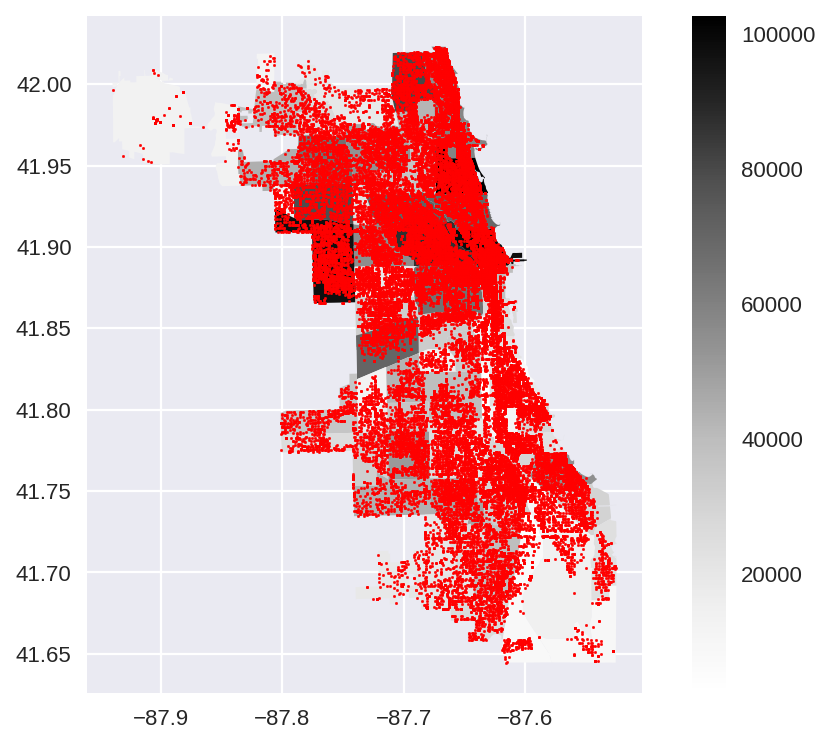

In [123]:
ax=theft.plot(color='r',markersize=1,zorder=2)
boundaries_data.plot(column='TOT_POP',ax=ax,zorder=1,legend=True)

Text(0.5, 1.0, 'Robbery')

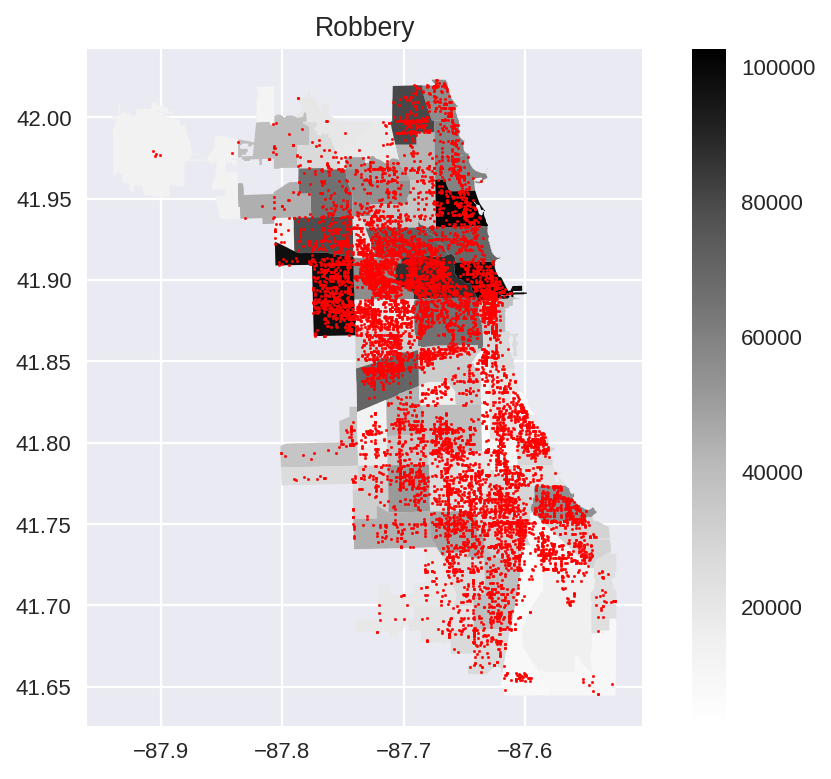

In [124]:
ax=robbery.plot(color='r',markersize=1,zorder=2)
boundaries_data.plot(column='TOT_POP',ax=ax,zorder=1,legend=True)
plt.title('Robbery')

Text(0.5, 1.0, 'Robbery')

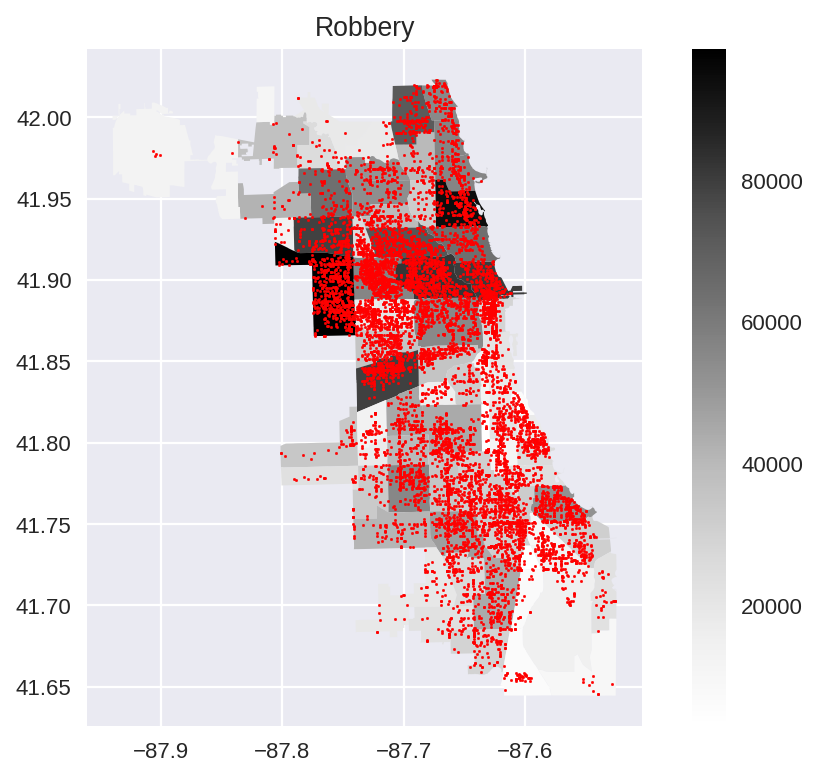

In [125]:
ax=robbery.plot(color='r',markersize=1,zorder=2)
boundaries_data.plot(column='2010_POP',ax=ax,zorder=1,legend=True)
plt.title('Robbery')

Text(0.5, 1.0, 'Robbery vs Income per cap')

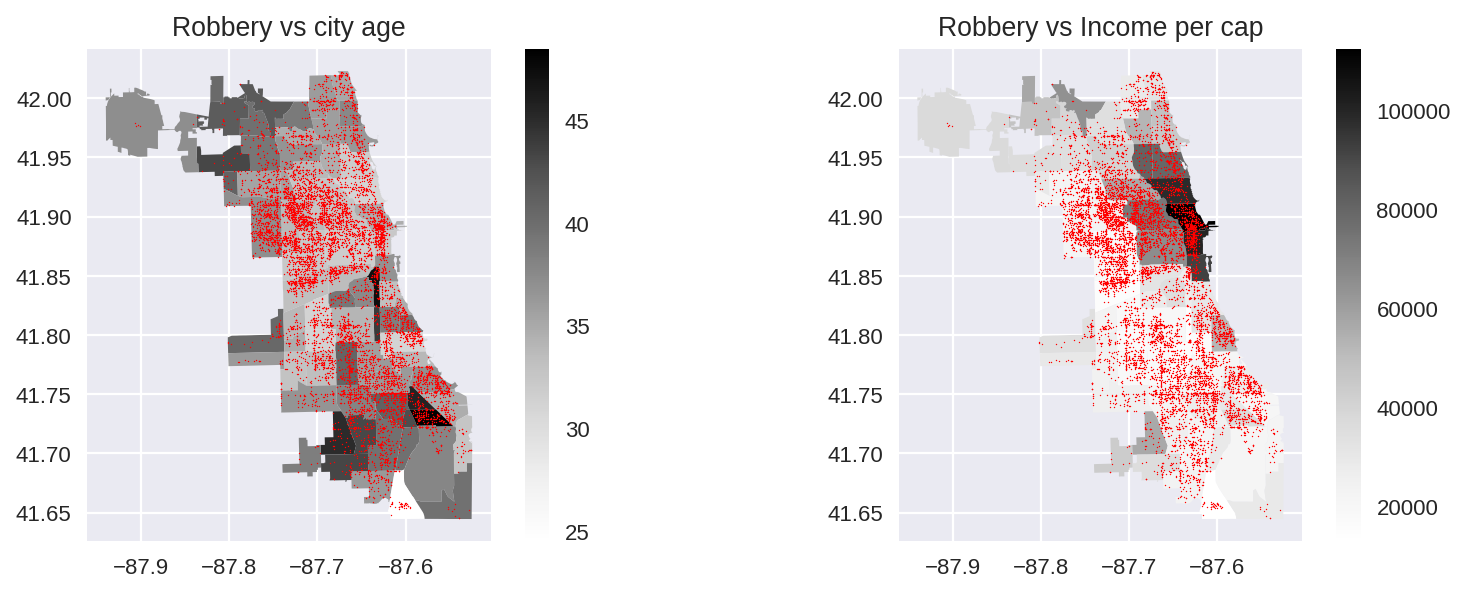

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
robbery.plot(color='r',markersize=0.1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_AGE',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Robbery vs city age')

i=1
robbery.plot(color='r',markersize=0.1,zorder=2, ax=axs[i])
boundaries_data.plot(column='INCPERCAP',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Robbery vs Income per cap')

Text(0.5, 1.0, 'Robbery vs Rent')

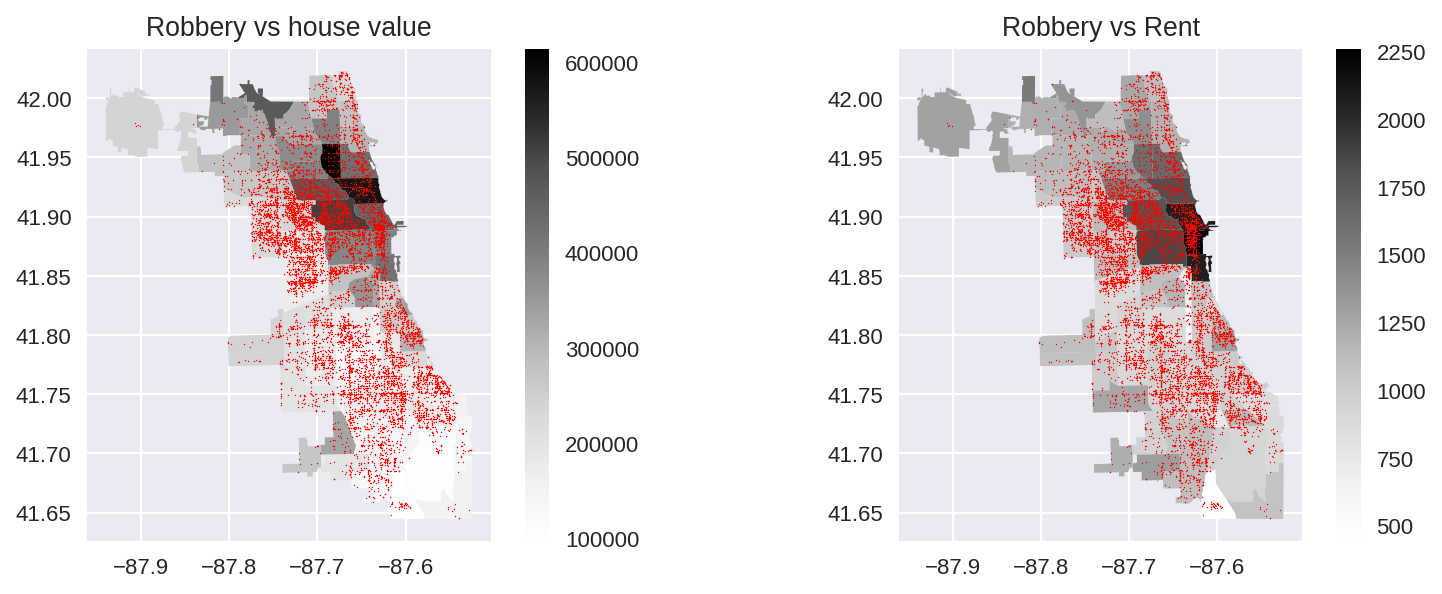

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
robbery.plot(color='r',markersize=0.1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_HV',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Robbery vs house value')

i=1
robbery.plot(color='r',markersize=0.1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_RENT',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Robbery vs Rent')

In [128]:
theft_sample_1000=theft.sample(1000)

Text(0.5, 1.0, 'Theft vs Rent')

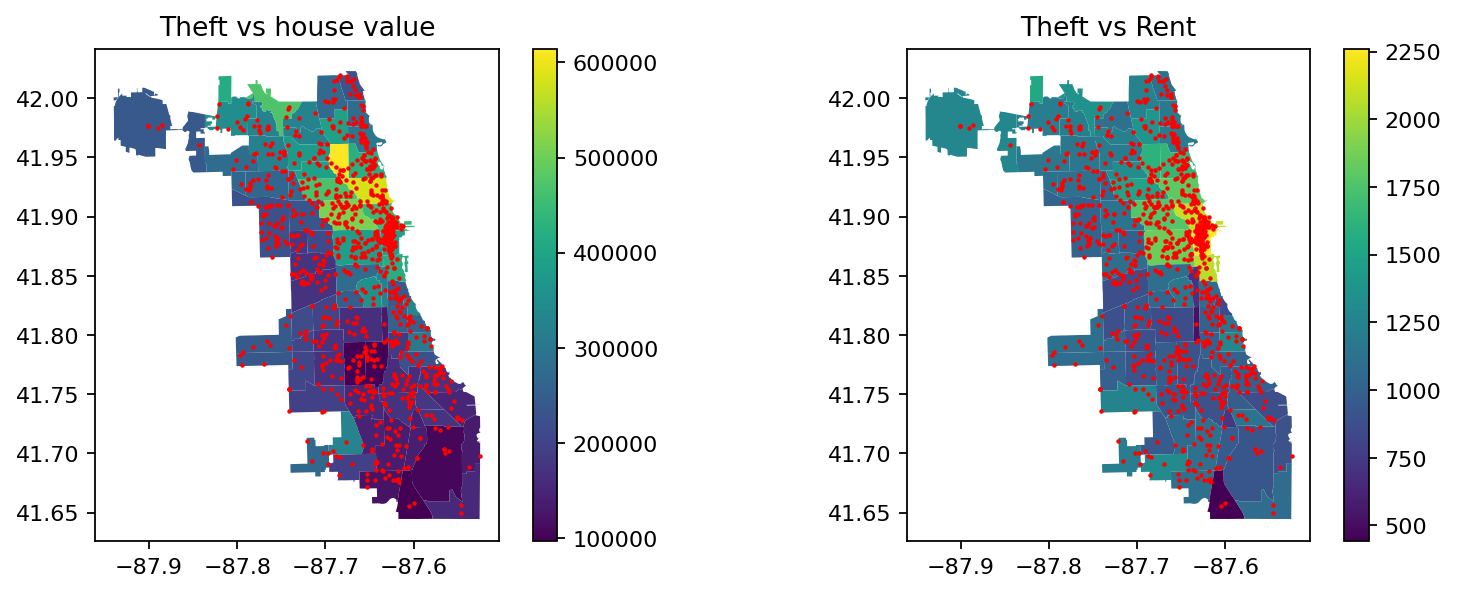

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
theft_sample_1000.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_HV',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Theft vs house value')

i=1
theft_sample_1000.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_RENT',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('Theft vs Rent')

Text(0.5, 1.0, 'all crime per capital')

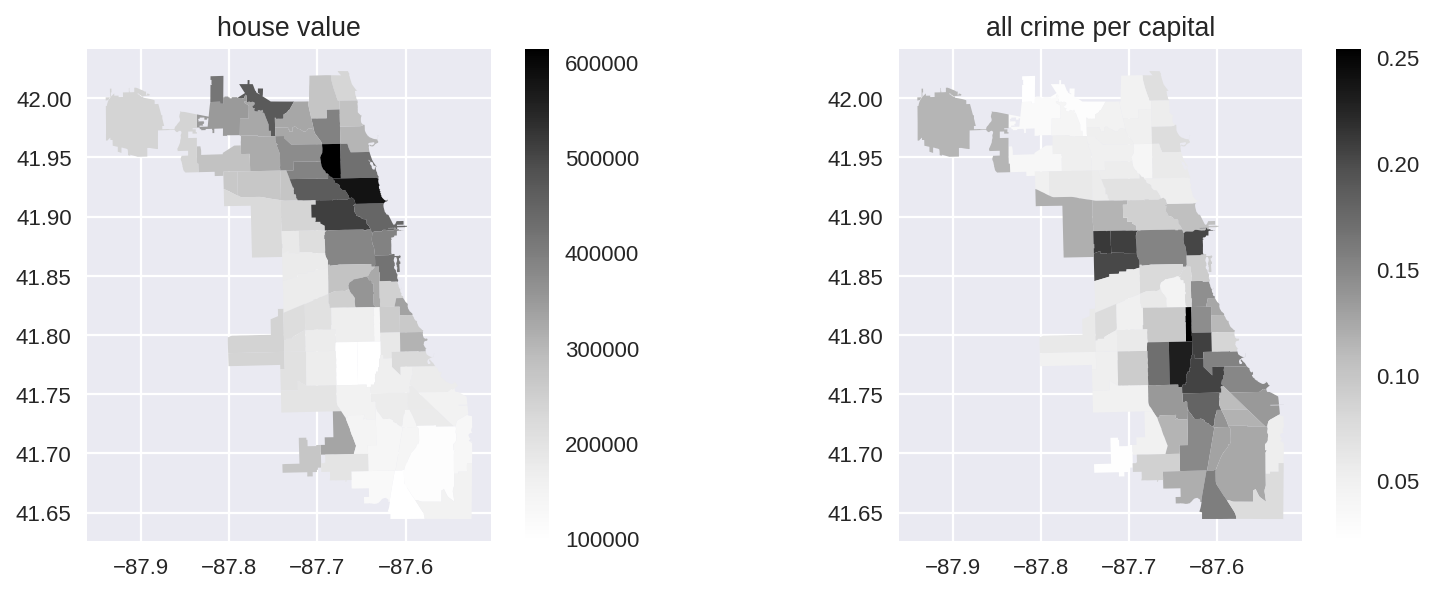

In [157]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0

boundaries_data.plot(column='MED_HV',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('house value')

i=1
# theft_sample_1000.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='crime_sum_percap',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('all crime per capital')

## join the agg crime data with eco


In [142]:
boundaries_data=boundaries_data.merge(crime_agg, how='left',left_on='community',right_on='community')

In [146]:
crime_agg

PRIMARY DESCRIPTION,community,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,crime_sum
0,ALBANY PARK,4.0,200.0,438.0,105.0,0.0,362.0,10.0,37.0,192.0,...,144.0,0.0,0.0,2.0,83.0,18.0,6.0,623.0,43.0,2501.0
1,ARCHER HEIGHTS,4.0,93.0,143.0,41.0,0.0,98.0,3.0,19.0,135.0,...,63.0,0.0,0.0,12.0,45.0,2.0,2.0,234.0,53.0,1024.0
2,ARMOUR SQUARE,2.0,83.0,159.0,37.0,0.0,142.0,0.0,18.0,64.0,...,31.0,0.0,0.0,5.0,97.0,4.0,1.0,255.0,41.0,1063.0
3,ASHBURN,6.0,201.0,338.0,75.0,1.0,263.0,11.0,42.0,186.0,...,155.0,0.0,0.0,4.0,78.0,12.0,8.0,382.0,88.0,2166.0
4,AUBURN GRESHAM,17.0,700.0,1324.0,236.0,5.0,874.0,31.0,109.0,258.0,...,468.0,0.0,0.0,18.0,274.0,27.0,19.0,950.0,346.0,6501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,4.0,123.0,242.0,92.0,0.0,236.0,10.0,26.0,125.0,...,95.0,0.0,0.0,10.0,50.0,7.0,0.0,391.0,69.0,1693.0
73,WEST PULLMAN,9.0,330.0,640.0,86.0,2.0,463.0,13.0,56.0,147.0,...,236.0,0.0,0.0,5.0,95.0,14.0,6.0,486.0,221.0,3236.0
74,WEST RIDGE,9.0,305.0,591.0,172.0,0.0,425.0,15.0,74.0,414.0,...,225.0,0.0,0.0,3.0,131.0,28.0,3.0,851.0,56.0,3752.0
75,WEST TOWN,7.0,447.0,802.0,304.0,5.0,940.0,34.0,123.0,457.0,...,303.0,0.0,0.0,15.0,539.0,42.0,7.0,2464.0,93.0,7757.0


Text(0.5, 1.0, 'All crime')

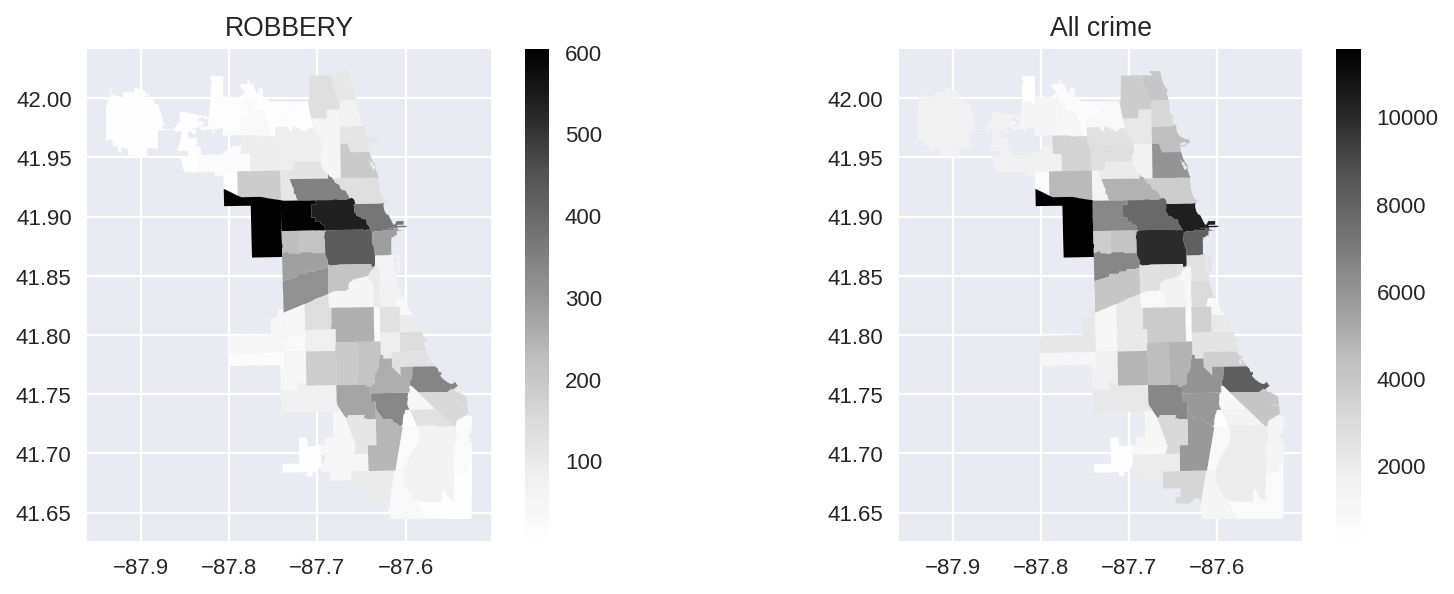

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
# theft_sample_1000.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='ROBBERY',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('ROBBERY')

i=1
# theft_sample_1000.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='crime_sum',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('All crime')

## EV charge stations

In [57]:
ev_data=gpd.read_file('./data/Alternative_Fuel_Locations_20231024.csv')
ev_data['geometry']=ev_data['Location'].apply(string_to_points)

In [63]:
ev_data=ev_data[ev_data['City']=='Chicago']

In [65]:
# should change to use polygon filtering
ev_data['Latitude']=ev_data['Latitude'].astype(float)
ev_data['Longitude']=ev_data['Longitude'].astype(float)

ev_data=ev_data[ev_data['Latitude']>41.5]
ev_data=ev_data[ev_data['Latitude']<42.05]
ev_data=ev_data[ev_data['Longitude']>-88]
ev_data=ev_data[ev_data['Longitude']<-87.4]

In [60]:
ev_data_clean=ev_data.drop(1139)

Text(0.5, 1.0, 'EV vs Rent')

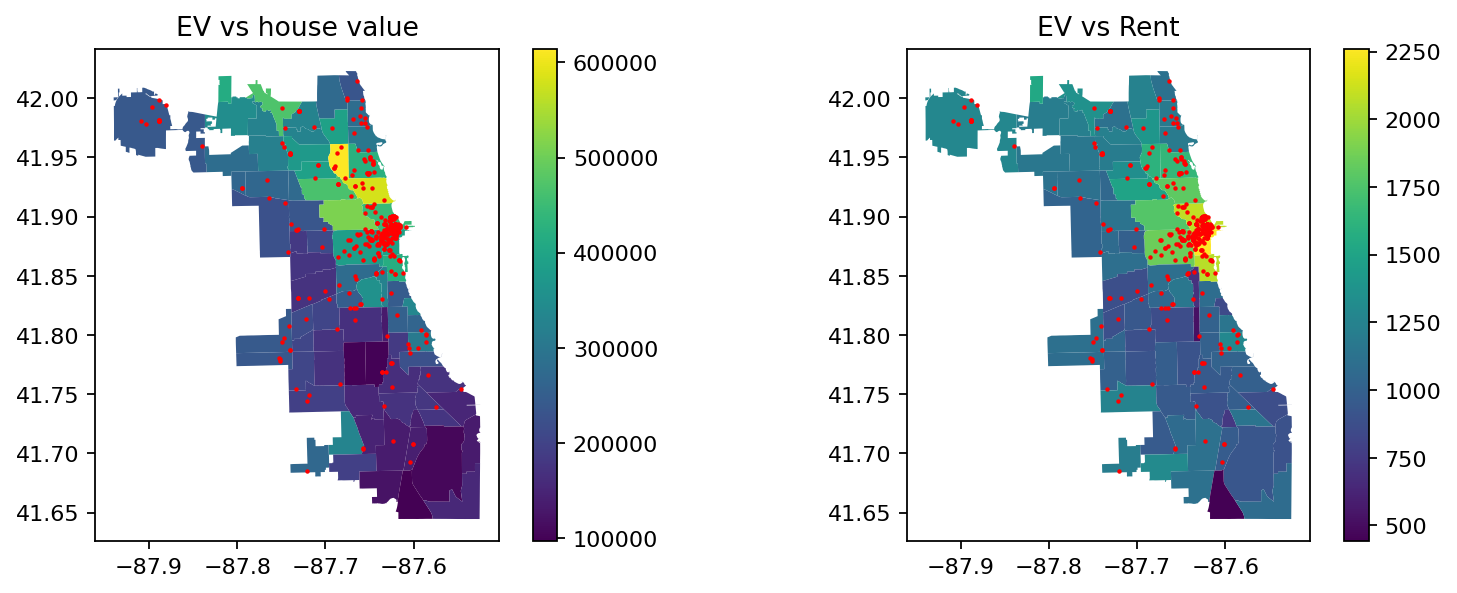

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = np.ravel(axs)

i=0
ev_data.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_HV',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('EV vs house value')

i=1
ev_data.plot(color='r',markersize=1,zorder=2, ax=axs[i])
boundaries_data.plot(column='MED_RENT',ax=axs[i],zorder=1,legend=True)
axs[i].set_title('EV vs Rent')

## CRIME Correlation

In [2]:
crime_agg.sum()[1:].sort_values()

NameError: name 'crime_agg' is not defined

In [144]:
boundaries_data['crime_sum_percap']=boundaries_data['crime_sum']/boundaries_data['TOT_POP']

In [158]:
boundaries_data['crime_sum_percap_log']=boundaries_data['crime_sum']/np.log(boundaries_data['TOT_POP'])

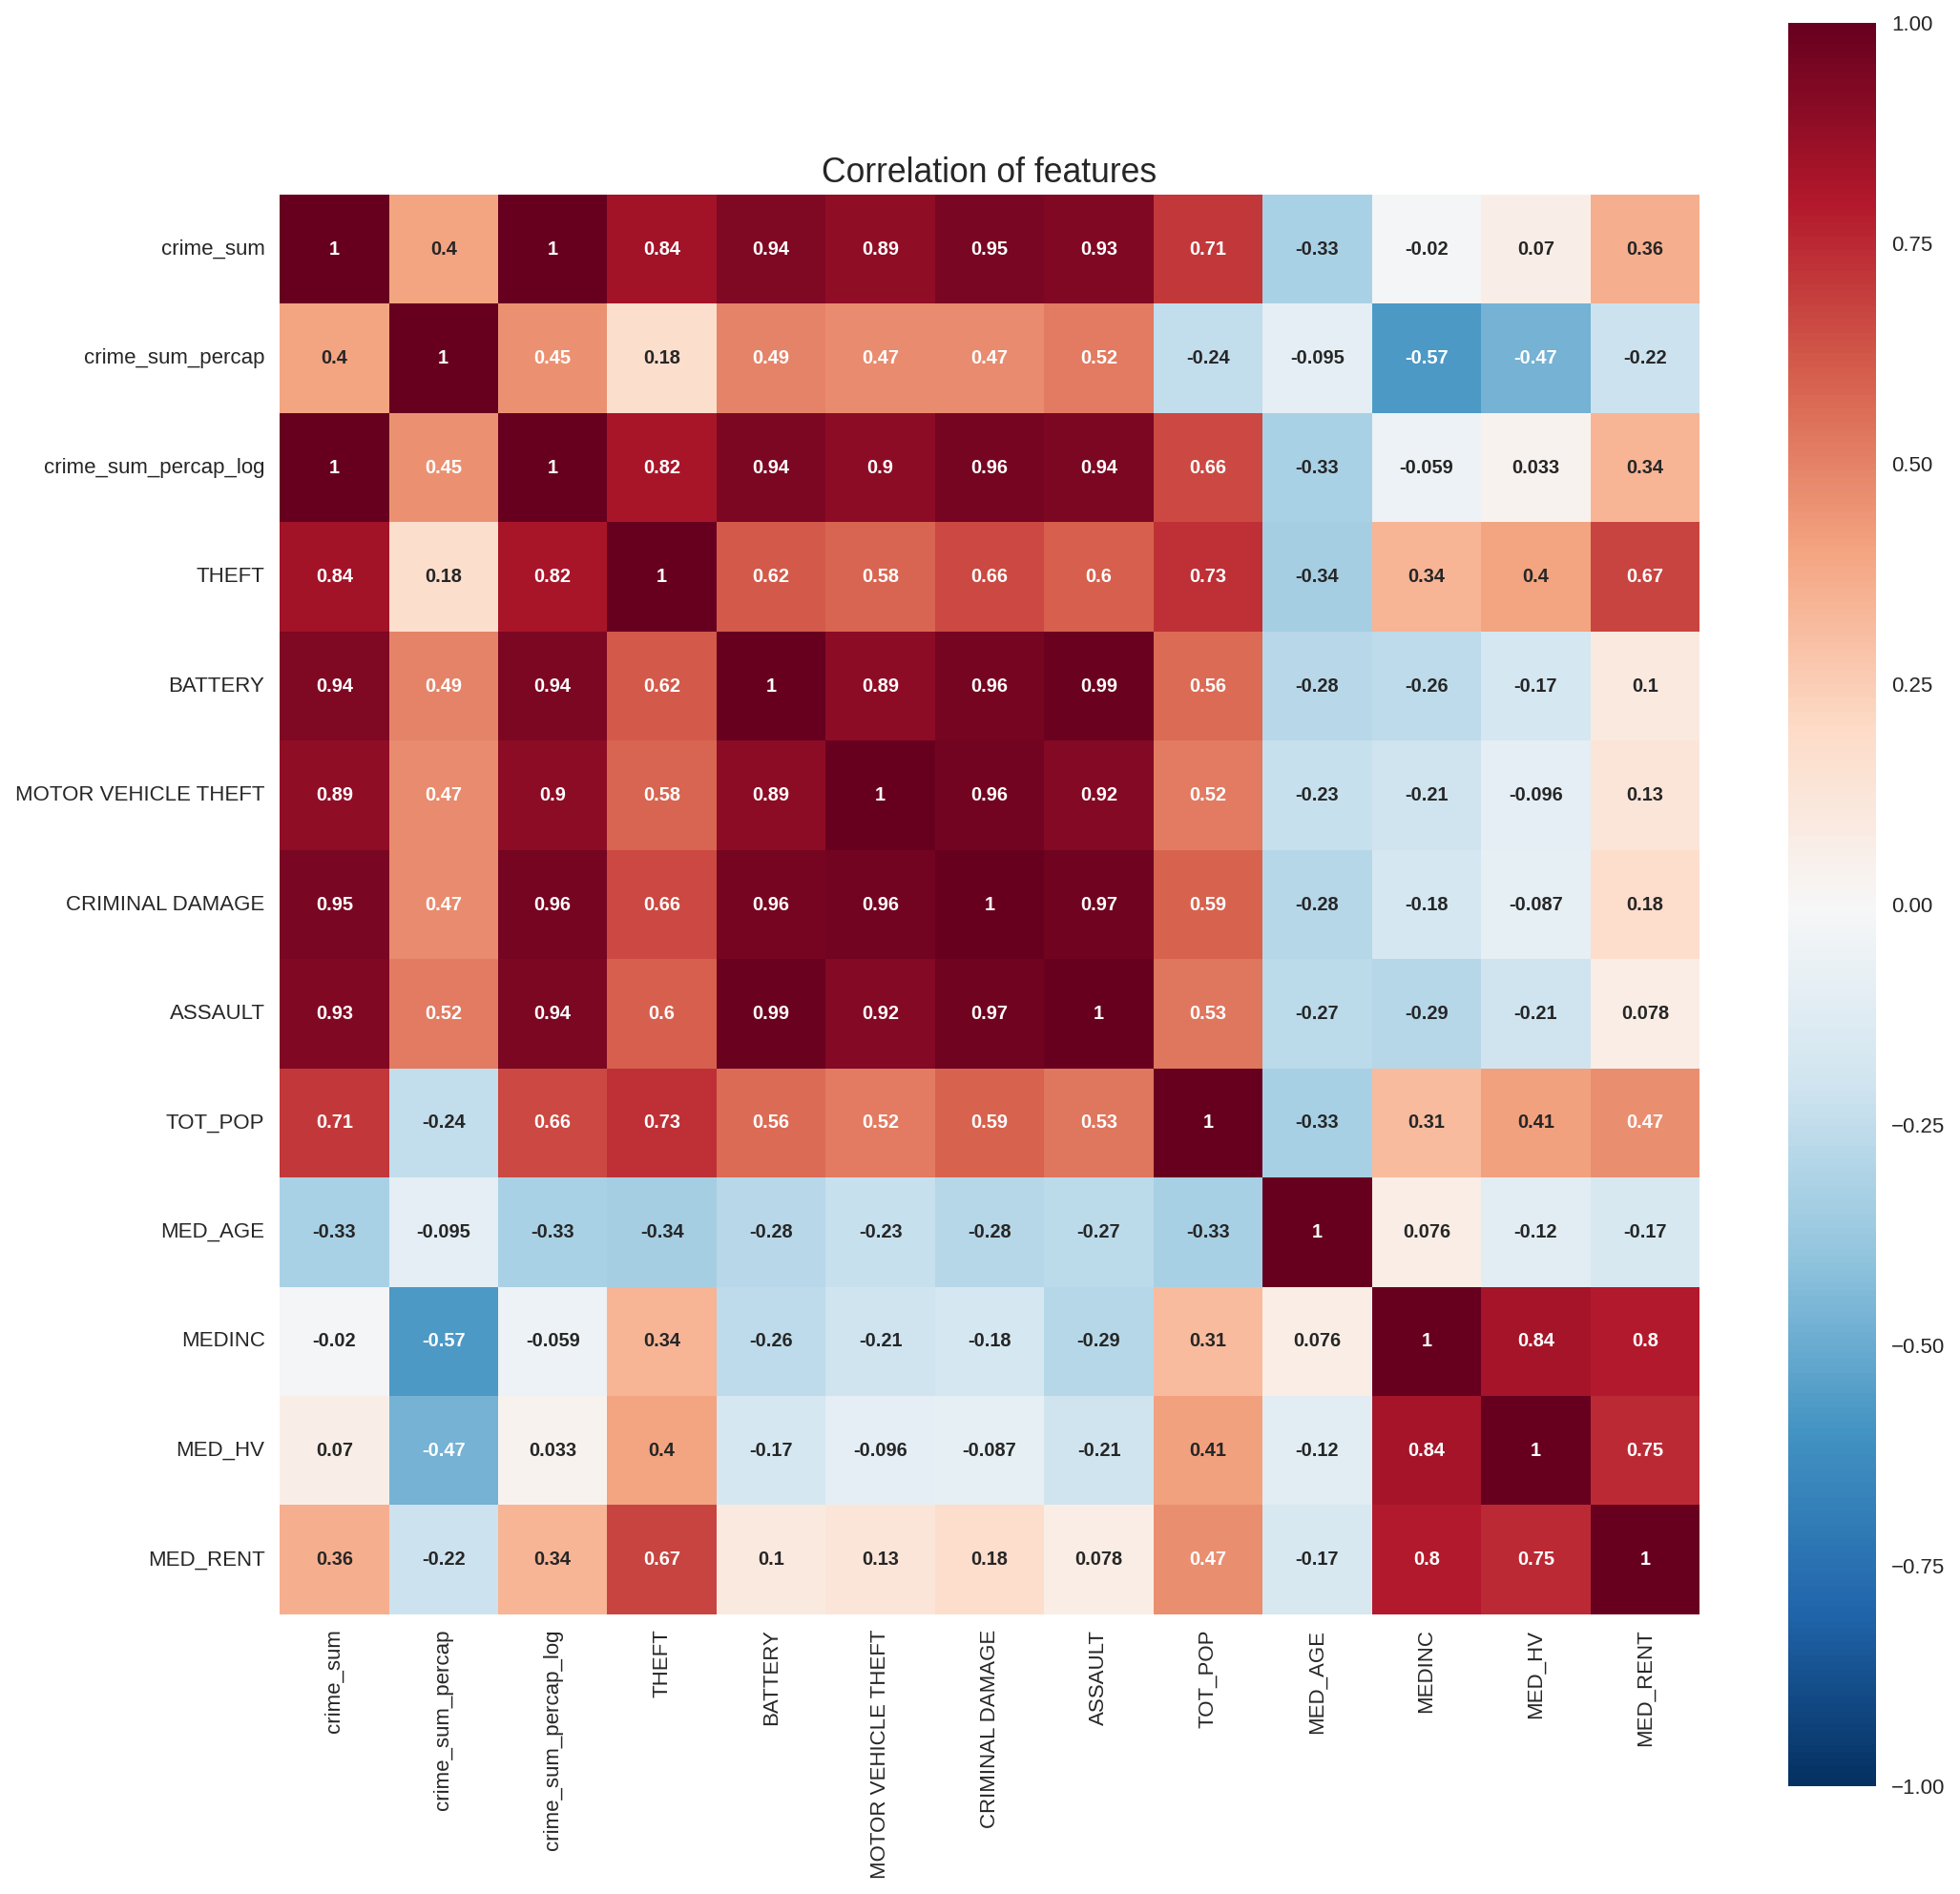

In [159]:
columns=['crime_sum','crime_sum_percap','crime_sum_percap_log','THEFT','BATTERY','MOTOR VEHICLE THEFT','CRIMINAL DAMAGE',
         'ASSAULT','TOT_POP','MED_AGE','MEDINC','MED_HV','MED_RENT']
plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    boundaries_data[columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.show()

Text(0.5, 1.0, 'crime vs crime rate log')

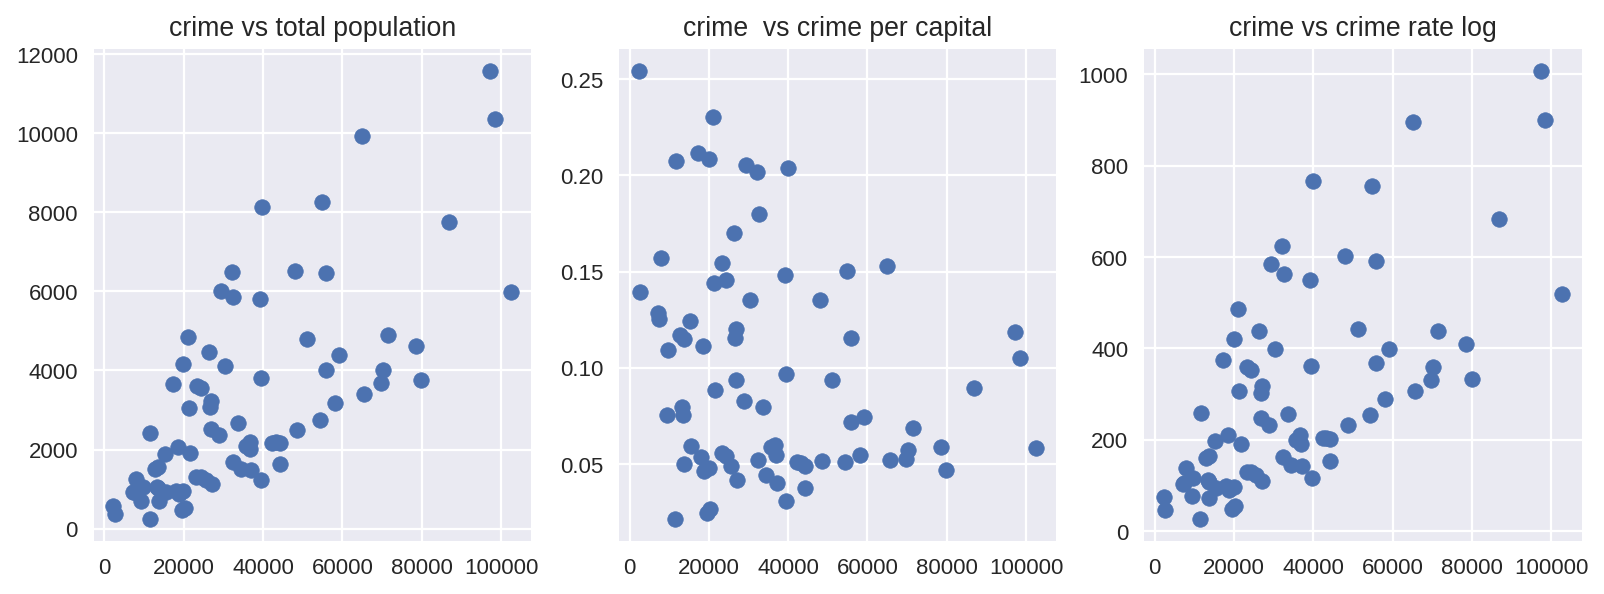

In [168]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs = np.ravel(axs)
i=0
plt.sca(axs[i])
plt.scatter(boundaries_data['TOT_POP'],boundaries_data['crime_sum'])
plt.title('crime vs total population')

i=1
plt.sca(axs[i])
plt.scatter(boundaries_data['TOT_POP'],boundaries_data['crime_sum_percap'])
plt.title('crime  vs crime per capital')

i=2
plt.sca(axs[i])
plt.scatter(boundaries_data['TOT_POP'],boundaries_data['crime_sum_percap_log'])
plt.title('crime vs crime rate log')

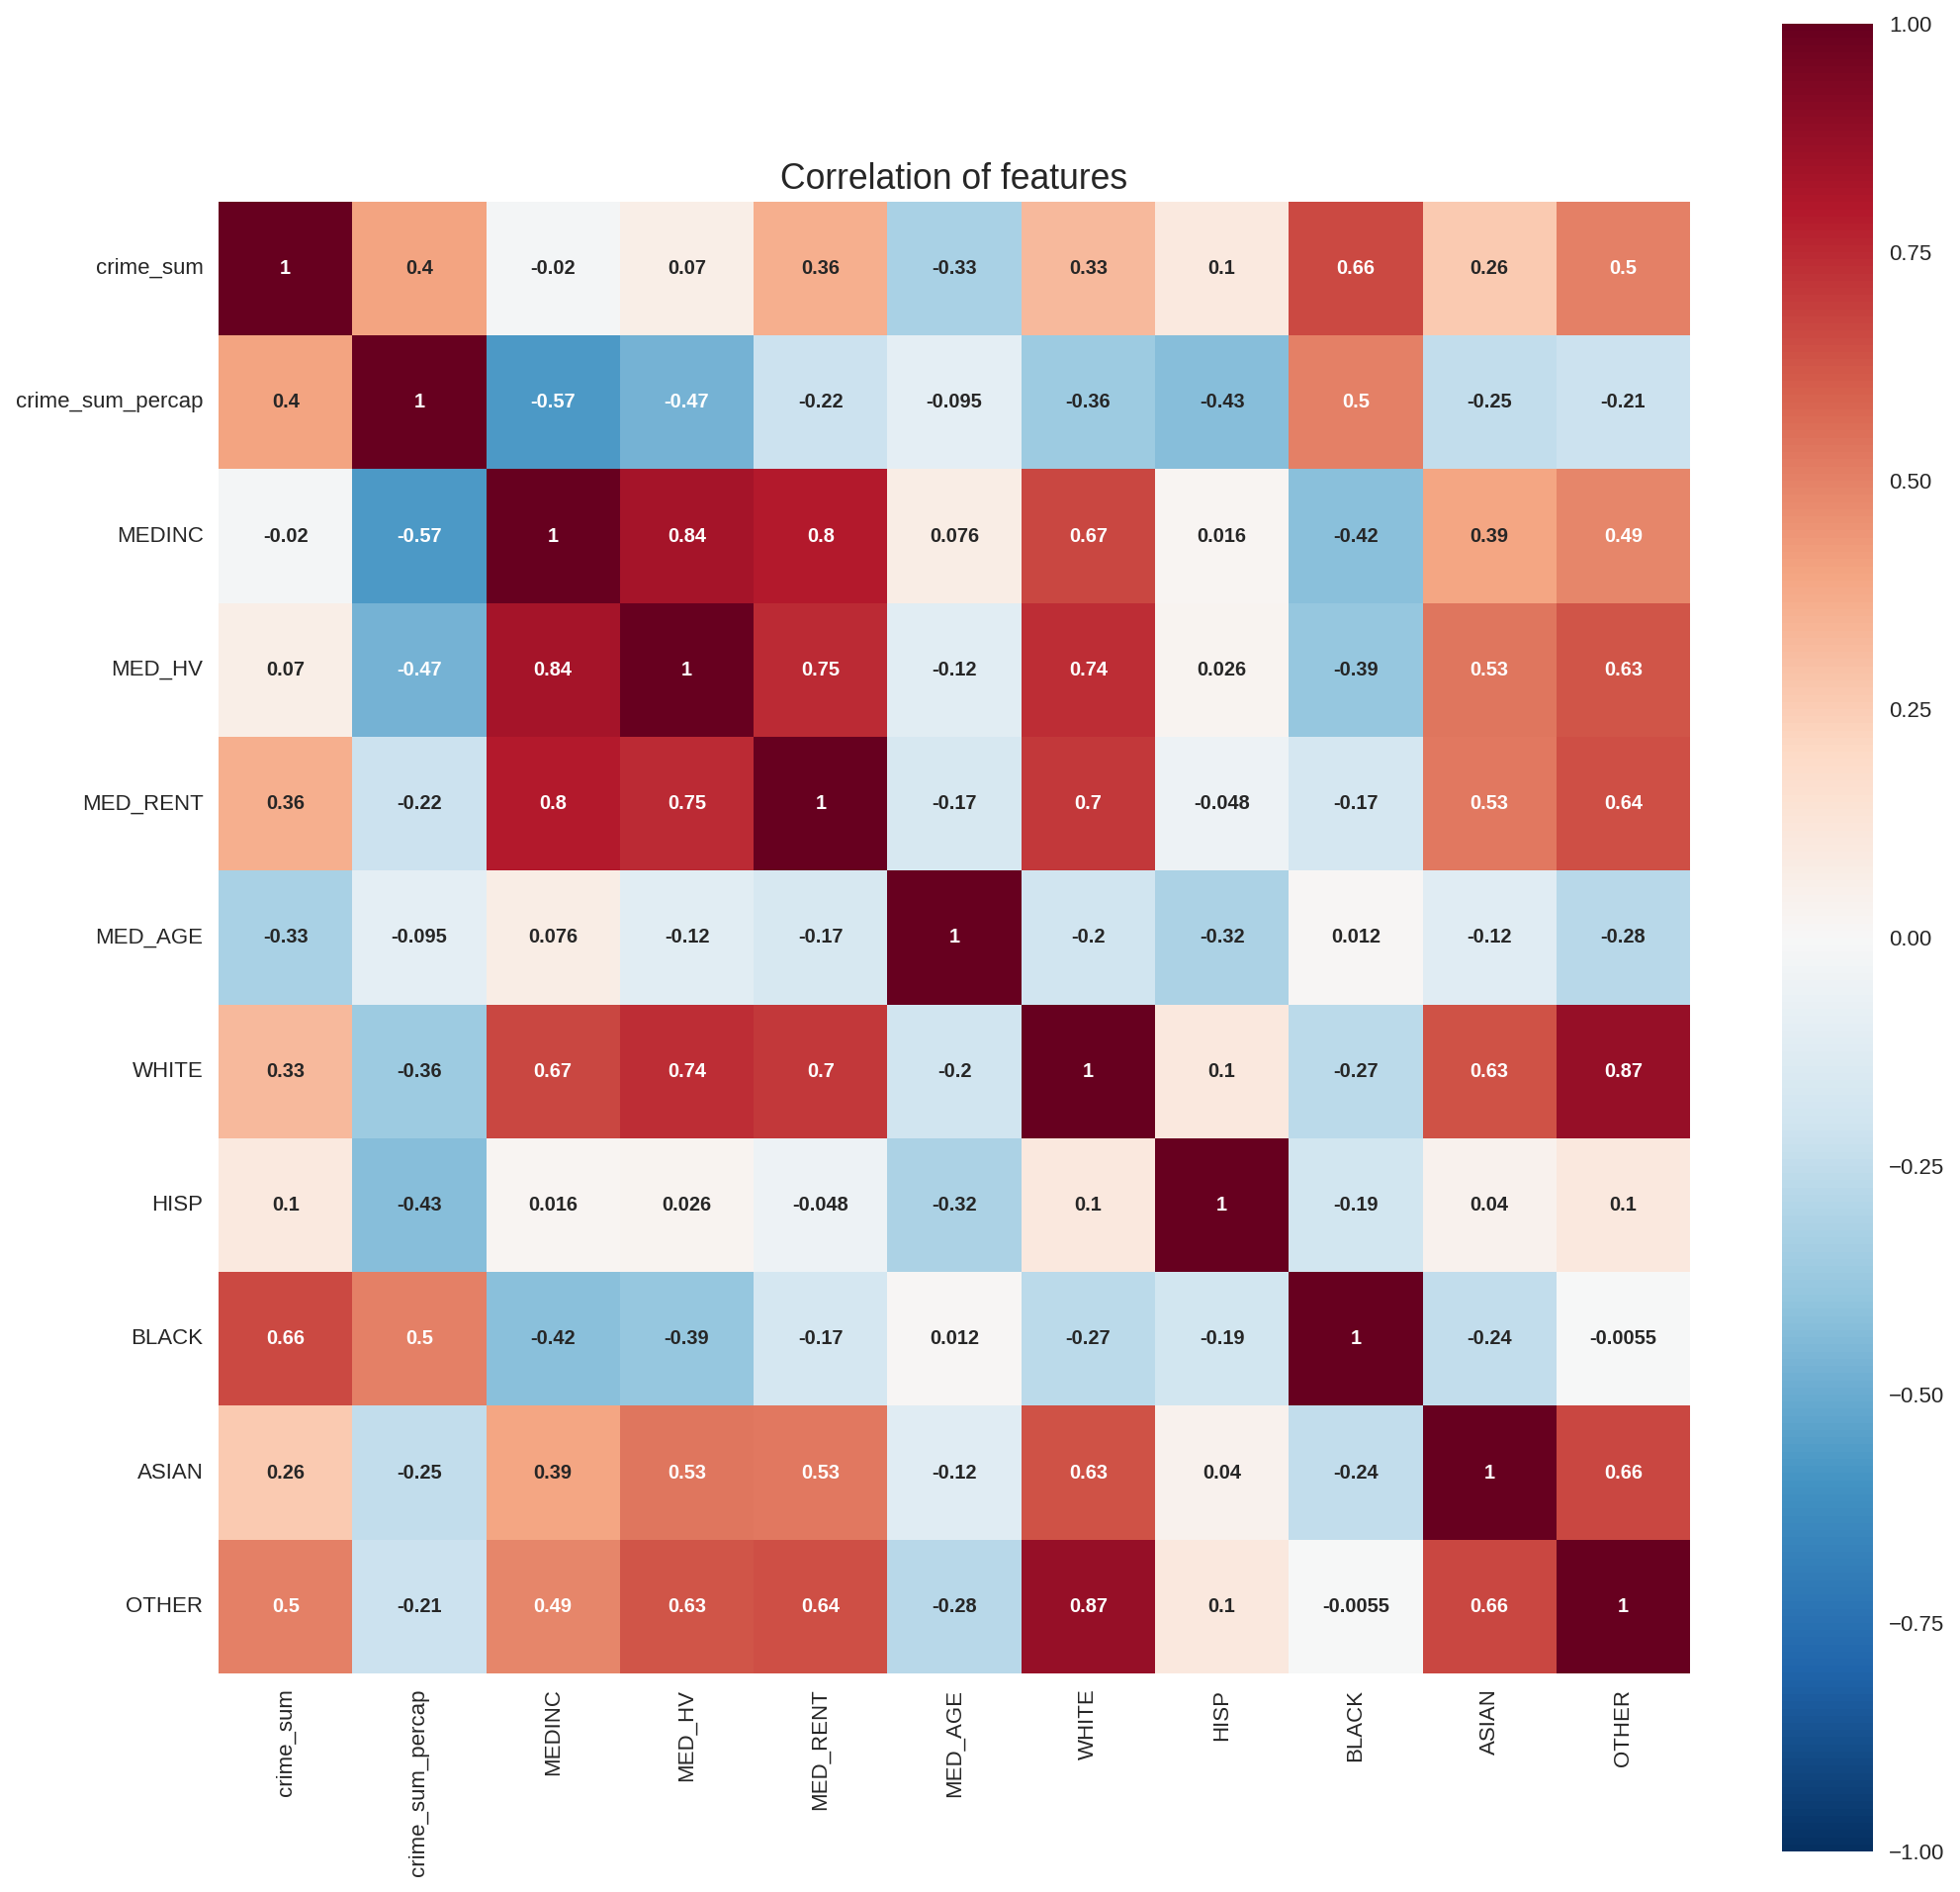

In [149]:
columns=['crime_sum','crime_sum_percap','MEDINC','MED_HV','MED_RENT','MED_AGE','WHITE','HISP','BLACK','ASIAN','OTHER']
plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    boundaries_data[columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.show()

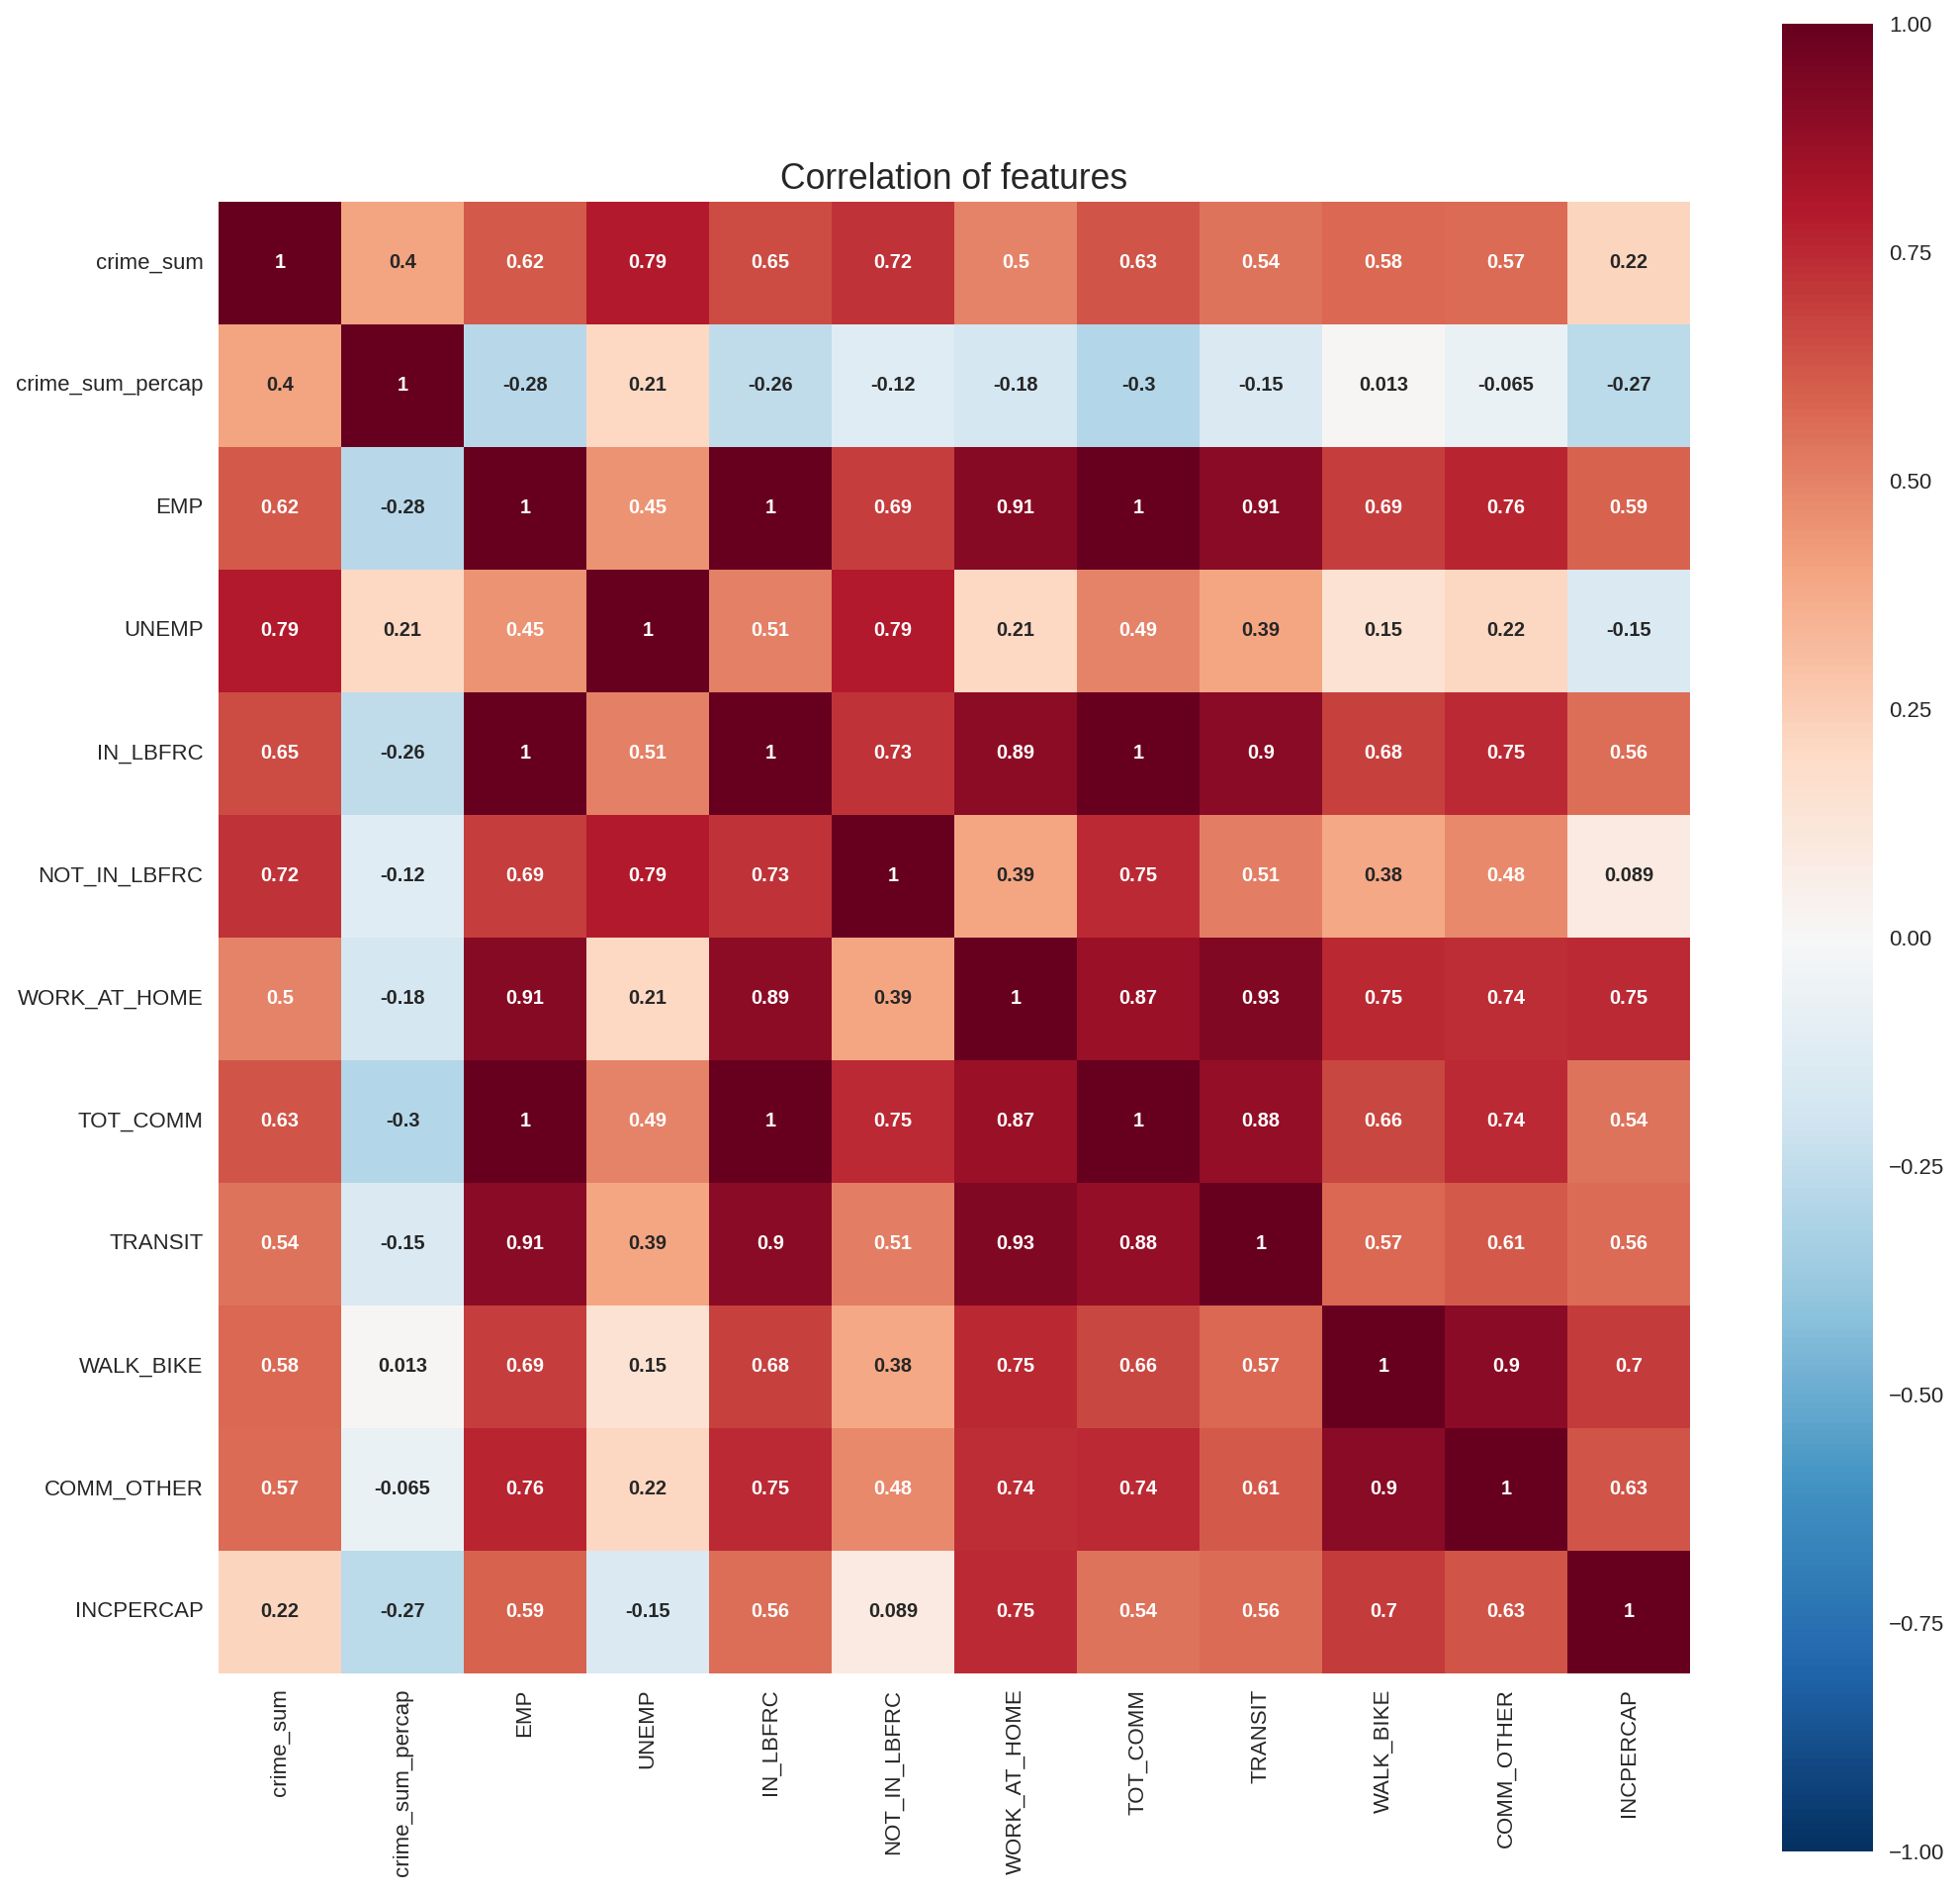

In [153]:
columns=['crime_sum','crime_sum_percap','EMP','UNEMP','IN_LBFRC','NOT_IN_LBFRC','WORK_AT_HOME','TOT_COMM','TRANSIT','WALK_BIKE','COMM_OTHER','INCPERCAP']
plt.figure(figsize=(15, 15))
plt.title('Correlation of features', size=16)
sns.heatmap(
    boundaries_data[columns].corr(), vmax=1.0, vmin=-1.0, square=True, cmap='RdBu_r', linecolor='white',
    annot=True, annot_kws={'size': 9, 'weight': 'bold'}, 
)

plt.show()

In [1]:
crime_data

NameError: name 'crime_data' is not defined